<a href="https://colab.research.google.com/github/Danish0212/Python/blob/main/Python/colab/Anomaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*****************************    OUTPUT   ******************************************



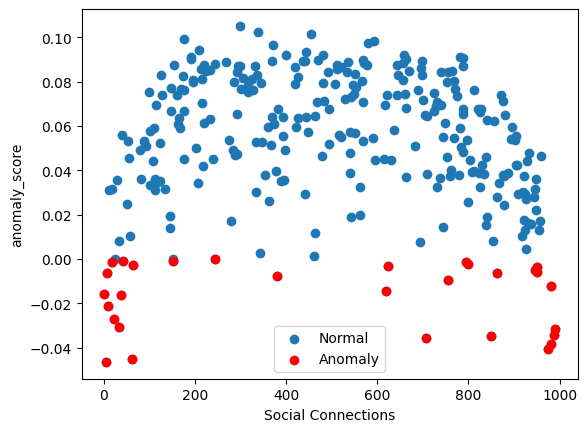

************************************************************************************



,user_id,account_creation_date,account_status,login_activity,posting_activity,social_connections,Anomaly
0,1,2021-03-14 22:28:29.698996655,active,81,47,863,no
1,2,2021-03-16 11:43:08.628762542,active,25,7,783,no
2,3,2021-03-18 00:57:47.558528428,active,16,12,833,no
3,4,2021-03-19 14:12:26.488294314,inactive,50,28,881,no
4,5,2021-01-28 22:23:40.735785953,inactive,26,46,1,yes


In [2]:

###   Problem statement    : To Detect the social media user behavior
###
###   Model implimentation : IsolationForest
###
###   Dataset              : Social network
###

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/Danish0212/Machine_learning/main/Data/Anamoly/Anomaly_Social_Network_Train.csv")

# Select the features to be used for anomaly detection
features = ["login_activity", "posting_activity", "social_connections"]

# Create a new dataframe with the selected features
X = df[features]

# Fit an Isolation Forest model to the data
model = IsolationForest(n_estimators=100, contamination=0.1)
model.fit(X)

# Predict the anomalies in the data
y_pred = model.predict(X)

# Add the predicted anomaly scores to the original dataframe
df["anomaly_score"] = model.decision_function(X)

anomalies = df.loc[df["anomaly_score"] < 0]

# predict
df_test= pd.read_csv("https://raw.githubusercontent.com/Danish0212/Machine_learning/main/Data/Anamoly/Anomaly_Social_Network_Test.csv")
x=df_test[["login_activity", "posting_activity", "social_connections"]]
df_values=x.values

find=df_values
result=[]
for i in find:
  z=model.predict([i])
  if z==[1]:
    result.append('no')
  elif z==[-1]:
    result.append('yes')

df_test['Anomaly']=result

print("*****************************    OUTPUT   ******************************************")
print("")
# Create a scatter plot of suspicious activity vs social connections
plt.scatter(df["social_connections"], df["anomaly_score"], label="Normal")
plt.scatter(anomalies["social_connections"], anomalies["anomaly_score"], color="r", label="Anomaly")
plt.xlabel("Social Connections")
plt.ylabel("anomaly_score")
plt.legend()
plt.show()

print("************************************************************************************")
print("")
df_test.head()